# 机器学习实验3：多项式拟合
将利用多输入的线性回归模型实现多项式的拟合
利用最小二乘求解，并可视化回归的结果
#### 要求：
1. 实值输入： $\begin{aligened}x\end{aligened}$
2. 真实的函数： $\begin{aligened}sin(2\pi x)\end{aligened}$
3. 观测值：$\begin{aligened}t = sin(2\pi x)+ Gaussian Noise\end{aligened}$
4. 训练集合： $\begin{aligened}N\end{aligened}$个样本 $\begin{aligened}(x(n), t(n)), n = 1, ..., N\end{aligened}$

In [249]:
# 导库
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt

In [250]:
# 初始化参数
N = 100                                                             # 样本个数
x = np.linspace(0, 1, N)                                            # 实值输入
noise = 0.1 * np.random.normal(0, 1, N)                             # 高斯噪声

In [251]:
# 真实的函数
def func(x):
    theta = 2 * np.pi * x
    return np.sin(theta)

In [252]:
# 用于拟合的多项式：设 y(x) = a0 + a1x + a2x^2 + ... + aNx^N
# x为输入，t为要拟合的函数，N为点的个数，M为多项式次数
def polynomial(x, t, N, M=3):
    power = np.arange(0, M+1)[:, np.newaxis]                            # 创建幂次向量，即(0, 1, ..., M)，并添加新维度
    e = np.tile(power, [1, N])                                          # 展开成M×N的形状
    x_b = np.power(x, e)                                                # 计算用于拟合的x，即(x^0, x^1, ..., x^M)
    pinv = numpy.linalg.pinv(np.dot(x_b.T, x_b))                        # 求伪逆
    w = np.dot(np.dot(pinv, x_b.T).T, t)                                # 求权重
    pol = np.matmul(w, x_b)                                             # 拟合的多项式
    return pol

In [254]:
# 真实函数与拟合函数
y = func(x)                                                         # 真实的函数
t = y + noise                                                       # 观测值
pol = polynomial(x, t, N, M=3)                                      # 拟合的多项式（可以修改不同的M的值）

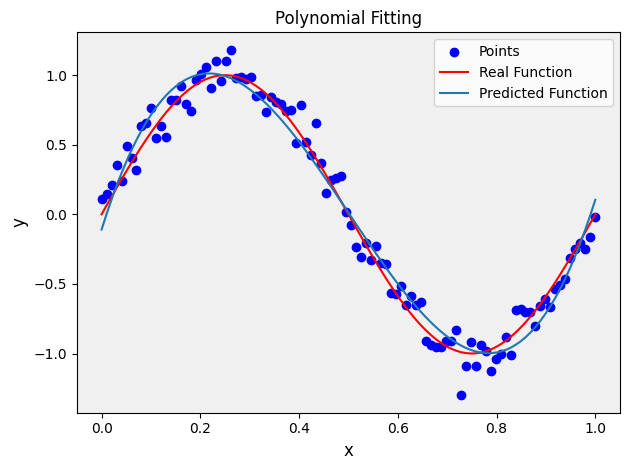

In [255]:
# 可视化
fig, ax = plt.subplots()                                            # 建画布
ax.scatter(x, t, marker='o', color='b', label='Points')             # 绘制散点
ax.plot(x, y, color='r', label='Real Function')                     # 绘制真实函数
ax.plot(x, pol, label='Predicted Function')                         # 绘制拟合曲线
ax.legend()                                                         # 添加图例
ax.set_xlabel('x', fontsize=12)                                     # 横坐标标签
ax.set_ylabel('y', fontsize=12)                                     # 纵坐标标签
ax.set_title('Polynomial Fitting')                                  # 设置图表标题
ax.tick_params(which='major', labelsize=10)                         # 设置刻度标签大小
ax.set_facecolor('#f0f0f0')                                         # 设置背景颜色
plt.tight_layout()                                                  # 调节位置，美化图像
plt.show()                                                          # 显示图像